In [2]:
!pip install wget
!pip install wandb

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=753cf3e8bac2ffe0d3e447846d4fc6edd67d888d3c355ec91db9fa65642165c0
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 1.8 MB 8.0 MB/s 
     |████████████████████████████████| 181 kB 41.8 MB/s 
     |████████████████████████████████| 144 kB 65.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=ea0f8ffe19934650c50aac663798196ccb2d84865da0284d2ee39b5b573751f4
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [3]:

from wandb.keras import WandbCallback

In [5]:
from wandb.keras import WandbCallback

In [6]:
import wandb

In [7]:
import os
from os.path import exists
import sys
import requests
import zipfile
import wget
#sys.path.append('../utility/')
#from  utility.Dataset import Dataset as ds
#from  utility.CNN import CNN as cnn
seed=42

In [8]:
cwd = os.getcwd()
train_dir='inaturalist_12K/train/'
test_dir='inaturalist_12K/val/'
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']

In [9]:

import os
from os.path import exists
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
import cv2
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
class Dataset:
    
    def downloadDataSet(self):
      cwd = os.getcwd()
     
      classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']
      file_exists = exists('./nature_12K.zip')
      if(file_exists==False):
        print('downloading....')
        os.system('curl -SL https://storage.googleapis.com/wandb_datasets/nature_12K.zip > nature_12K.zip')
        print('download Complete')
      extract_exists = exists('./inaturalist_12K/')   
      if(extract_exists==False):  
        savePath=cwd
        savefile='./nature_12K.zip'
        print('Extracting..')
        with zipfile.ZipFile(savefile, 'r') as zip_ref:
            zip_ref.extractall(savePath)
        print('Complete')
       
        
    def showRandomImageOfEveryClass(self,imagesize=128):
       classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']
       imagePath='./inaturalist_12K/train'
       listImages=[]
       columns = 5
       rows = 5
       imcount=1
       
       for i in classes:
           p=imagePath+'/'+i
           files=os.listdir( p)
           img=random.choice(files)
           imgplt=mpimg.imread( p+'/'+str(img))
           imgplt=cv2.resize(imgplt,(imagesize,imagesize)) 
           listImages.append(imgplt)
           #plt.imshow(imgplt)
           #fig.add_subplot(rows, columns, imcount)
           #imcount+=1
           #plt.axis('off')
           #plt.title(i) 
       
       _, axs = plt.subplots(1, 10, figsize=(15, 15))
       axs = axs.flatten()
       for img, ax,cls in zip(listImages, axs,classes):
         
           ax.imshow(img)
           ax.axis('off')
           ax.set_title(str(cls))
       plt.show()
    
    
    def import_dataset(self,seed,image_size=128,augment_data=False):
        #All variables 
        cwd=os.getcwd()
        batchsize=32
        image_size=image_size
        train_dir = './inaturalist_12K/train/'
        test_dir = './inaturalist_12K/val/'
        print('Training Dataset')

        #perform Augmentation if augment_data=True
        if augment_data:
            train_datagen = ImageDataGenerator(rescale=1./255,
                                          rotation_range=90,
                                          zoom_range=0.2,
                                          shear_range=0.2,
                                          validation_split=0.1,
                                          horizontal_flip=True)
            test_datagen = ImageDataGenerator(rescale=1./255)
        else:
            train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
            test_datagen = ImageDataGenerator(rescale=1./255)

        train_ds = train_datagen.flow_from_directory(train_dir,subset="training", class_mode='sparse',color_mode='rgb',target_size=(image_size, image_size), batch_size=batchsize)
        val_ds = train_datagen.flow_from_directory(train_dir,subset="validation",class_mode='sparse', color_mode='rgb',target_size=(image_size, image_size), batch_size=batchsize)
        print('')
        print('Test Dataset')
        test_ds = test_datagen.flow_from_directory(test_dir, target_size=(image_size, image_size) ,class_mode='sparse',color_mode='rgb',batch_size=30)
    



    
        return train_ds,val_ds, test_ds
               

In [21]:
"""
Following functions used to construct an CNN network

Parameters
---------
filters: number of filters in each layer.This is mendatory parameter
size_of_filters: Size of filters in each layers
BatchNormalization: If true apply batch normalisation after each layer
number_of_neurons_dense_layer : Dense layer neuron 
number_of_classes: Total number of classes
dropout: dropout rate
BatchNormalization: Whether batch normalization applied

filterSize: 
size of filter in first layer .mostly used only when filterOrganization selected

filterOrganization:
Some default configuaration selected.Optionally user can pass there own custom filter configuration from
"filters" parameter.This is optional parameter.Values are [all_same ,incr ,decr ,alt_incr ,alt_decr ]
               
config_all_same:[64,64,64,64,64]
config_incr : [16,32,64,128,256]
config_decr: [256,128,64,32,16]
config_alt_incr: [32,64,32,64,32]  
config_alt_decr:[64,32,64,32,64]              
 
"""
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv2D , MaxPool2D,MaxPooling3D , Flatten , Dropout, Dense, Activation, BatchNormalization
class CNN:

    def train(self,model,train_ds,val_ds,optimizer="adam",lr=0.0001,epoch=5,wandbLog=False):
        if(optimizer=="sgd"):
          model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9),\
              loss=[tf.keras.losses.SparseCategoricalCrossentropy()],\
              metrics=['accuracy']
              ) 
        else:
          model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),\
              loss=[tf.keras.losses.SparseCategoricalCrossentropy()],\
              metrics=['accuracy']
              ) 
        
        early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
        if(wandbLog):
          hist=model.fit(train_ds, epochs=epoch,validation_data=val_ds,callbacks=[early_stop,WandbCallback()])
        else:
          hist=model.fit(train_ds, epochs=epoch,validation_data=val_ds,callbacks=[early_stop])
     
        return model
    def setUp(self,filters=[16,32,64,128,256],\
            size_of_filters= [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)],\
            activation_function="relu",\
            number_of_neurons_dense_layer=256,\
            number_of_classes=10,\
            dropout=0,\
            BatchNormalization=True,
            filterSize=32,
            filterOrganization='custom',
            imsize=300
           ):
     
        if(filterOrganization=='config_all_same'):
            filters=[64,64,64,64,64]
        if(filterOrganization=='config_incr'):
            filters=[16,32,64,128,256]
        if(filterOrganization=='config_decr'):
            filters=[256,128,64,32,16]
        if(filterOrganization=='config_alt_incr'):
            filters=[32,64,32,64,32]     
        if(filterOrganization=='config_alt_decr'):
            filters=[64,32,64,32,64]

        model = Sequential()
        num_of_filters=len(filters)
        model.add(Conv2D(filters[0], size_of_filters[0],input_shape=(imsize,imsize,3),name='conv1'))
        if BatchNormalization:
                model.add(tf.keras.layers.BatchNormalization()) 
        model.add(MaxPooling2D((2,2)))

        for i in range(num_of_filters-1):
            model.add(Conv2D(filters[i+1], size_of_filters[i+1],name='conv'+str(i+2)))

            model.add(Activation(activation_function))
            if BatchNormalization:
                model.add(tf.keras.layers.BatchNormalization()) 
            model.add(MaxPooling2D((2,2)))


        model.add(Flatten())

        model.add(Dense(number_of_neurons_dense_layer,activation=activation_function)) 
        if BatchNormalization:
                model.add(tf.keras.layers.BatchNormalization())
        if(dropout>0):
            model.add(Dropout(dropout))
        model.add(Dense(number_of_classes, activation='softmax'))
        return model



In [11]:
ds=Dataset()

In [12]:
ds.downloadDataSet()

downloading....
download Complete
Extracting..
Complete


In [14]:
train_ds,val_ds,test_ds=ds.import_dataset(seed=42,image_size=300,augment_data=True)

Training Dataset
Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.

Test Dataset
Found 2000 images belonging to 10 classes.


In [13]:
import wandb
user = "kankan-jana"
project = "CS6910_Assignment-2"

wandb.login()
wandb.init(entity=user, project=project)

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kankan-jana (use `wandb login --relogin` to force relogin)


In [22]:

    
number_of_neurons_in_the_dense_layer=512
augment_data=True
filterOrganization='config_incr'
activation_function='relu'
dropout=0.2
optimizer='adam'
lr=0.0001
BatchNormalization=True
#sample inputs
image_size=300
ds=Dataset()
train_ds,val_ds,test_ds=ds.import_dataset(seed=42,image_size=image_size,augment_data=augment_data)
cnn=CNN()
no_of_filters = [256,256,256,256,256]
size_of_filters = [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]

number_of_classes=10
modelA=cnn.setUp(no_of_filters,size_of_filters,\
          activation_function,\
          number_of_neurons_in_the_dense_layer,\
          number_of_classes,\
          dropout,BatchNormalization,\
          filterSize=16,\
         filterOrganization=filterOrganization,imsize=image_size) 

epoch=25
wandbLog=False
modelB=cnn.train(modelA,train_ds,val_ds,optimizer,lr,epoch,wandbLog)
    
 


Training Dataset
Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.

Test Dataset
Found 2000 images belonging to 10 classes.
Epoch 1/25
282/282 [==============================] - 293s 1s/step - loss: 2.3984 - accuracy: 0.2412 - val_loss: 2.9113 - val_accuracy: 0.1371 - _timestamp: 1649488354.0000 - _runtime: 8839.0000
Epoch 2/25
282/282 [==============================] - 291s 1s/step - loss: 2.1139 - accuracy: 0.2919 - val_loss: 2.0337 - val_accuracy: 0.2953 - _timestamp: 1649488645.0000 - _runtime: 9130.0000
Epoch 3/25
282/282 [==============================] - 292s 1s/step - loss: 2.0317 - accuracy: 0.3134 - val_loss: 1.9430 - val_accuracy: 0.3353 - _timestamp: 1649488937.0000 - _runtime: 9422.0000
Epoch 4/25
282/282 [==============================] - 292s 1s/step - loss: 1.9774 - accuracy: 0.3321 - val_loss: 1.9094 - val_accuracy: 0.3534 - _timestamp: 1649489229.0000 - _runtime: 9714.0000
Epoch 5/25
282/282 [==============================] - 291s 1s

In [23]:
modelB.evaluate(test_ds)

67/67 [==============================] - 24s 362ms/step - loss: 1.7667 - accuracy: 0.4110


[1.7666609287261963, 0.41100001335144043]

In [30]:
model= modelB

In [31]:
model.evaluate(test_ds)

67/67 [==============================] - 25s 365ms/step - loss: 1.7667 - accuracy: 0.4110


[1.7666608095169067, 0.41100001335144043]

In [32]:
model.save('bestmodel_PartA')

INFO:tensorflow:Assets written to: bestmodel_PartA/assets


In [33]:
randomSamples=test_ds.subset

classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']
imagePath='inaturalist_12K/val/'
listImages=[]
listLabels=[]
columns = 5
rows = 5
imcount=1
clsLabel=0
for i in classes:
    p=imagePath+'/'+i
    files=os.listdir( p)
    img1=random.choice(files)
    imgplt1=mpimg.imread( p+'/'+str(img1))
    imgplt1=cv2.resize(imgplt1,(300,300)) 
    listImages.append(imgplt1)
    img2=random.choice(files)
    imgplt2=mpimg.imread( p+'/'+str(img2))
    imgplt2=cv2.resize(imgplt2,(300,300)) 
    listImages.append(imgplt2)
    img3=random.choice(files)
    imgplt3=mpimg.imread( p+'/'+str(img3))
    imgplt3=cv2.resize(imgplt3,(300,300)) 
    listImages.append(imgplt3) 
    listLabels.append(clsLabel)
    listLabels.append(clsLabel)
    listLabels.append(clsLabel)
    clsLabel+=1



### Plot 30 random images from Test Dataset and show there actual vs predicted Result

In [34]:
predictions=[]
for image in listImages:
  pred=model.predict(image.reshape(1,300,300,3)).argmax()
  predictions.append(pred)

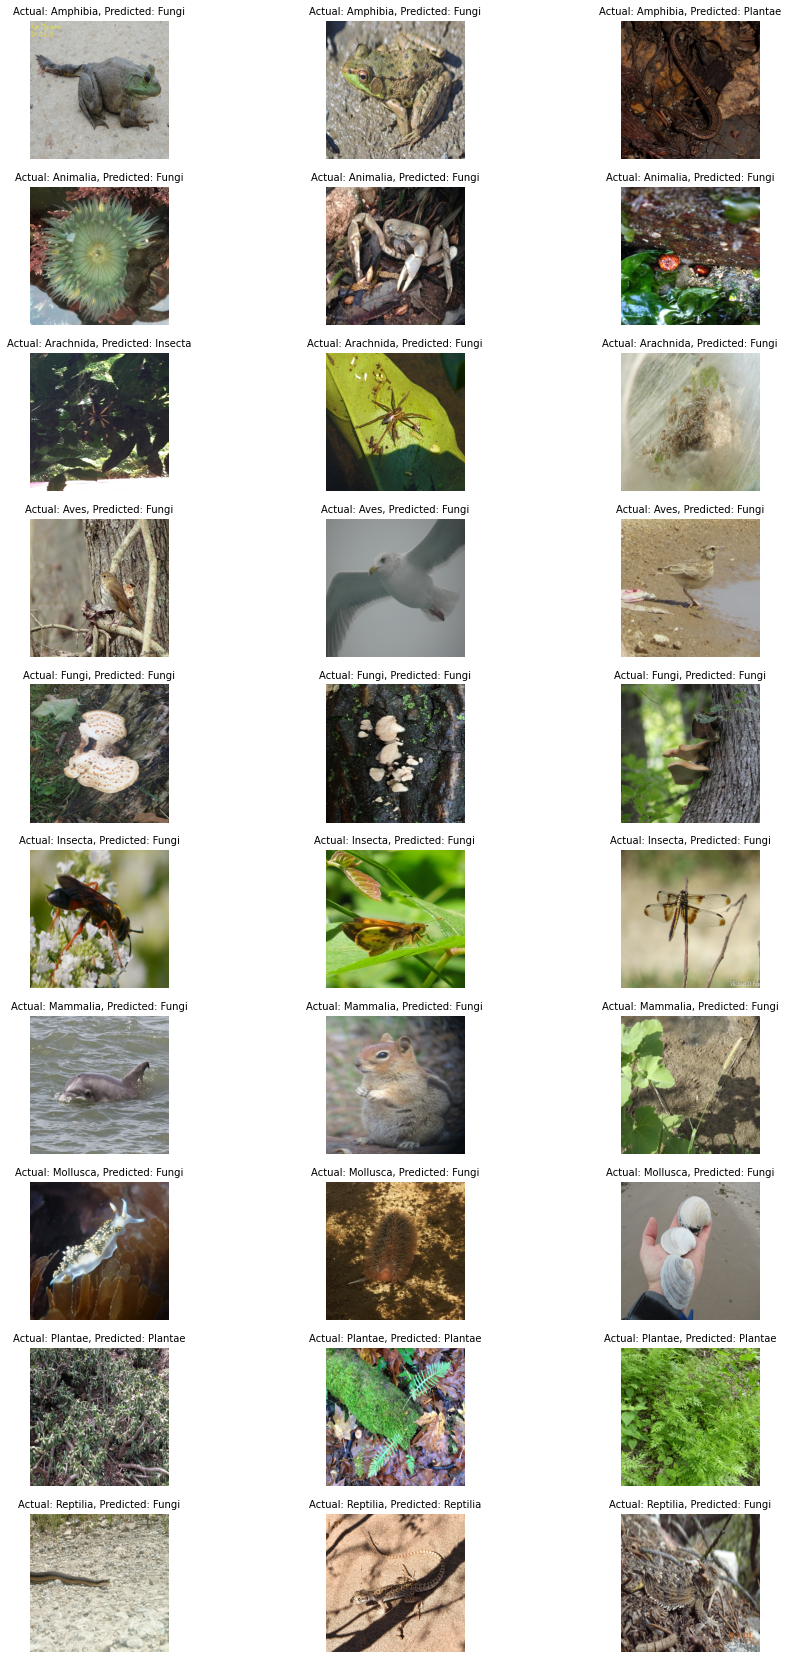

In [35]:

fig = plt.figure(figsize=(15,30))

for i in range(30):
  img=cv2.resize(listImages[i],(300,300))
  fig.add_subplot(10,3,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title('Actual: '+str(classes[listLabels[i]])+', Predicted: '+str(classes[predictions[i]]),fontdict={'fontsize':10})
  

### Filter visualisation RGB channels

In [36]:
#Iterate thru all the layers of the model
layer= model.layers[0]
weights, bias= layer.get_weights()
filters, biases = layer.get_weights()
#print(layer.name, filters.shape)

#normalize filter values between  0 and 1 for visualization
f_min, f_max = weights.min(), weights.max()
filters = (weights - f_min) / (f_max - f_min)  



### Visualisation through separate R,G,B channel

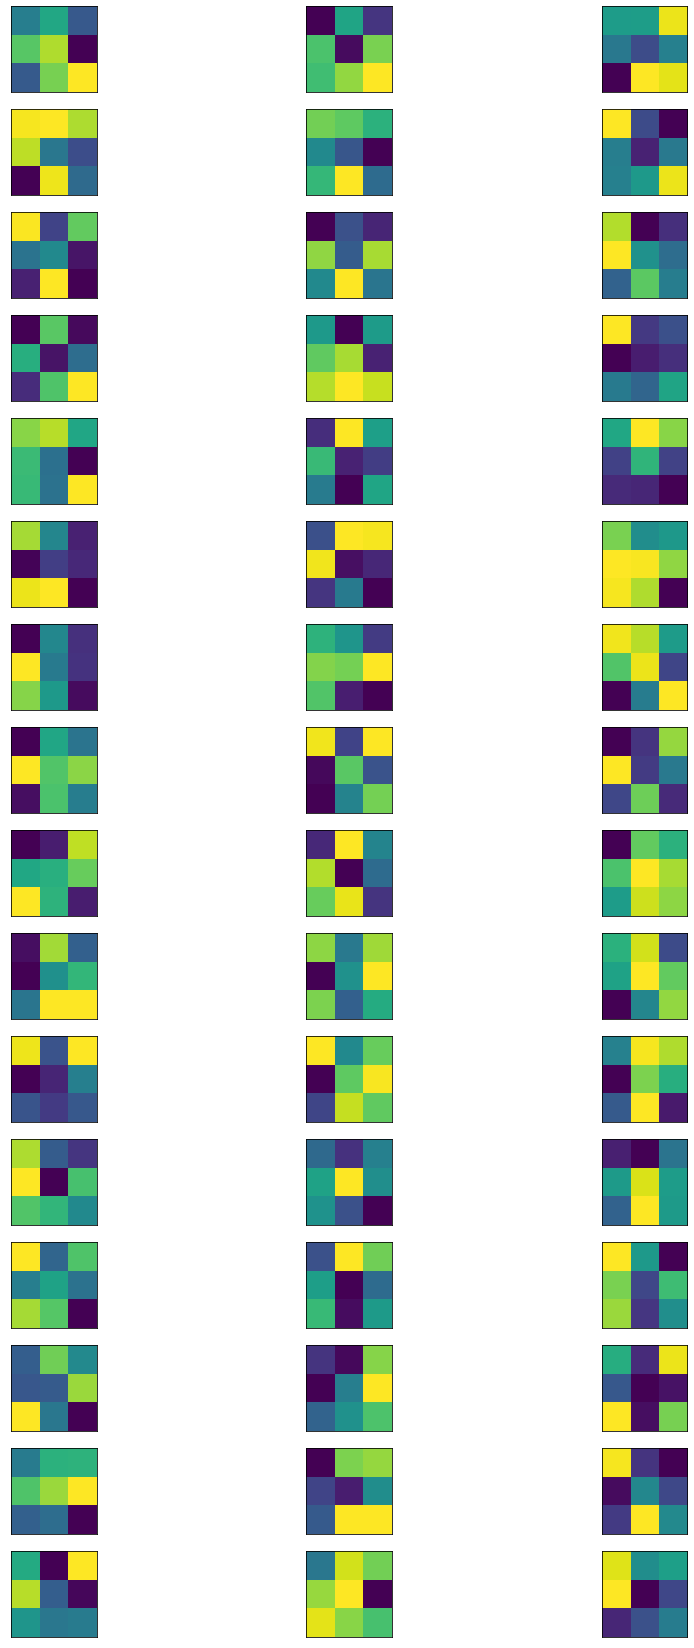

In [37]:
filter_cnt=1
fig = plt.figure(figsize=(15,30))
#plotting all the filters
for i in range(filters.shape[3]):
    #get the filters
    filt=filters[:,:,:, i]
    #plotting each of the channel, color image RGB channels
    for j in range(filters.shape[0]):
        ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(filt[:,:, j])
        filter_cnt+=1
plt.show()

### Filter visualisation RGB Channel combined

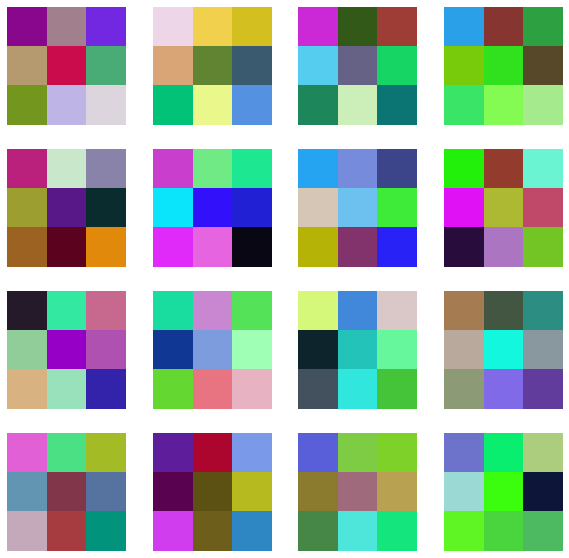

In [38]:
#The following plot shows the 16 filters in a 4x4 grid, with RGB channels combined.
filter_cnt=1
fig = plt.figure(figsize=(10,10))

#plotting all the filters
for i in range(filters.shape[3]):
    #get the filters
    filt=filters[:,:,:, i]
    fig.add_subplot(4,4,i+1)
   
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(filt[:,:])
    filter_cnt+=1
    plt.axis('off')
plt.show()

### Select an image for showing filter visualisation

(-0.5, 299.5, 299.5, -0.5)

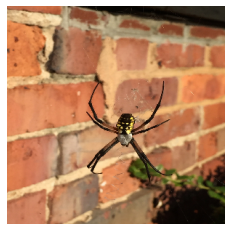

In [39]:
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']
imagePath='inaturalist_12K/val'
i=random.choice(range(len(classes)))
path=imagePath+'/'+classes[i]
files=os.listdir( path)
imgchoice=random.choice(files)
image=tf.keras.preprocessing.image.load_img(path+'/'+str(imgchoice), color_mode="rgb", target_size=(300, 300))
plt.imshow(image)
plt.axis('off')

### All layers associated with the model

In [40]:
all_layers=[]
for l in model.layers:
  if('conv' in l.name):
    all_layers.append(l.name )


### Feature Map

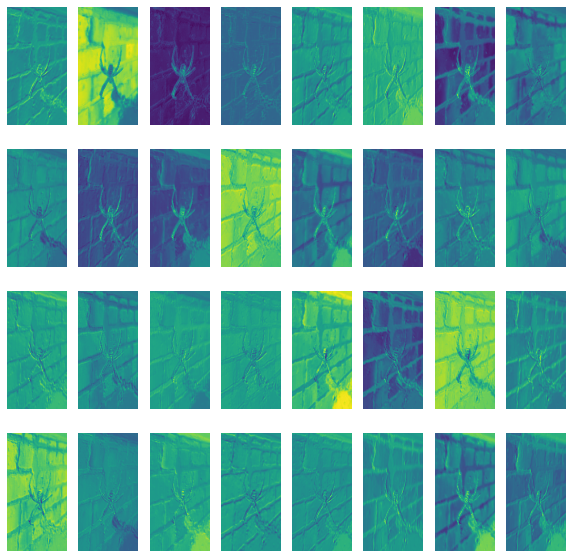

In [41]:

filter_cnt=1
#output of first layer
outputs = [model.get_layer(all_layers[1]).output]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = outputs)
x   = tf.keras.utils.img_to_array(image)                           
x   = x.reshape((1,) + x.shape)
x /= 255.0

feature_map = visualization_model.predict(x)

 
n_features = feature_map.shape[-1]  # number of features in the feature map
size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

"""# Postprocess the feature 
for i in range(n_features):
  x  = feature_map[0, :, :, i]
  x -= x.mean()
  x /= x.std ()
  x *=  64
  x += 128
  x  = np.clip(x, 0, 255).astype('uint8')
  feature_map[0, :, :, i]=x"""


fig = plt.figure(figsize=(10,10))

#plotting all the filters
for i in range(n_features):  
    fig.add_subplot(int(4),int(n_features/4),i+1)
    plt.imshow(feature_map[0, :, :, i], aspect='auto')
    filter_cnt+=1
    plt.axis('off')
plt.show()



### Guided Backprop

In [42]:

all_act_Layer_Names=[]
for layer in model.layers:
    if('activation' in layer.name ):
        all_act_Layer_Names.append(layer.name)
print(all_act_Layer_Names)

['activation_8', 'activation_9', 'activation_10', 'activation_11']


In [43]:

all_Conv_Layer_Names=[]
for layer in model.layers:
    if('conv' in layer.name ):
        all_Conv_Layer_Names.append(layer.name)
print(all_Conv_Layer_Names)

['conv1', 'conv2', 'conv3', 'conv4', 'conv5']


In [44]:
@tf.custom_gradient
def guidedRelu(x):
  def grad(dy):
    return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
  return tf.nn.relu(x), grad


def GuidedBackprop(model,  Nuber_of_neurons=10):
  LAYER_NAME = all_Conv_Layer_Names[-1]
  train_dir='inaturalist_12K/train/'
  test_dir='inaturalist_12K/val/'
  classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']
  
  #Apply guided back prop on conv 5 layer
  guided_backprop_model = tf.keras.models.Model(
    inputs = [model.inputs],    
    outputs = [model.get_layer(LAYER_NAME).output])
  layer_activations = [layer for layer in guided_backprop_model.layers[1:] if hasattr(layer,'activation')]
    
  #apply guided relu
  for layer in layer_activations:
    if layer.activation == tf.keras.activations.relu:
      layer.activation = guidedRelu
    
  #select random image from test directory
  #random_cat=random.choice(range(len(classes)))
  random_cat=8
  category = classes[random_cat]
  dir=os.path.join(test_dir,category)

  files=os.listdir( dir)
  
  #imgpath=random.choice(files)
  imgpath="b4da1ba61661a95f12e8f9c653330222.jpg"
 
 
  rows =12
  columns=1
  img_path=(os.path.join(dir,imgpath))
  imgs=cv2.imread(img_path)
  img=cv2.resize(imgs,(300,300))
  fig = plt.figure(figsize=(50,50))
  fig.add_subplot(rows,columns,1)
  
  plt.imshow(imgs)
  plt.axis('off')
  plt.title('Original Image:'+str(category))
  #plt.imshow(img)
  x = np.expand_dims(img, axis=0)
  i=0
  j = 0
  k=1
  while k <= Nuber_of_neurons:
      
    with tf.GradientTape() as tape:       
      inputs = tf.cast(x, tf.float32)
      tape.watch(inputs)
      outputs = guided_backprop_model(inputs)[0]
      out = outputs[i,j,k]
      grads = tape.gradient(out,inputs)[0]
      
      guided_back_prop =grads
      gb_viz = np.dstack((
                  guided_back_prop[:, :, 0],
                  guided_back_prop[:, :, 1],
                  guided_back_prop[:, :, 2],
              ))       
      gb_viz -= np.min(gb_viz)
      gb_viz /= gb_viz.max()
      fig.add_subplot(rows,columns,k+2)
      plt.imshow(gb_viz)
      plt.axis('off')
      plt.title('neuron'+str(k))
      
      k+=1
      #just ensure not picking same neuron
      j+=1
      i+=1
     
     
           
        
      


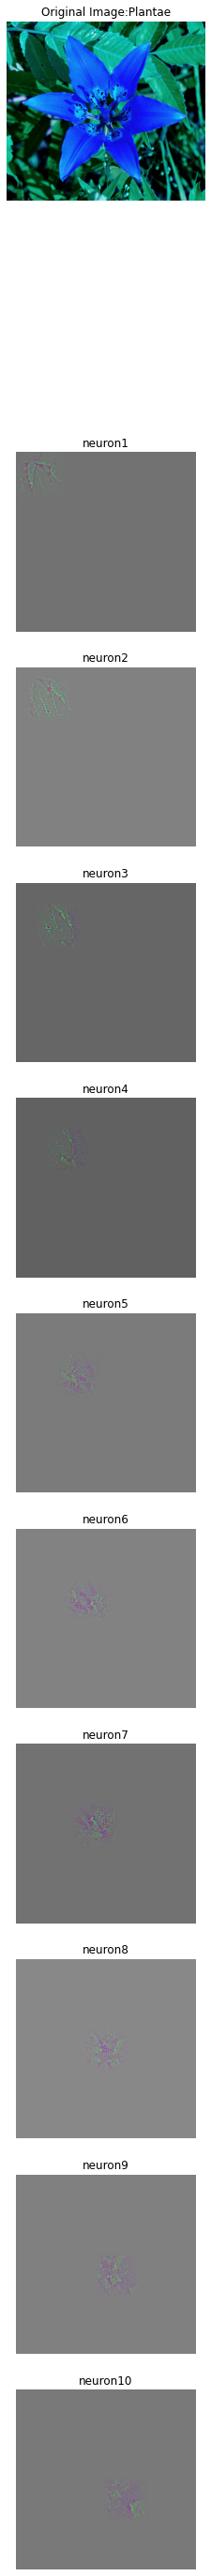

In [45]:
GuidedBackprop(model,10)